In [188]:
# for presentation purposes
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from scipy import stats


import prepare
from acquire import get_df

# visualize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#train test split from sklearn
from sklearn.model_selection import train_test_split
#imputer from sklearn
from sklearn.impute import SimpleImputer

# to evaluate performance using rmse
from sklearn.metrics import mean_squared_log_error
from math import sqrt

# for tsa
import statsmodels.api as sm

# holt's linear trend model.
from statsmodels.tsa.api import Holt

# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Logistic Regression
from sklearn.linear_model import LogisticRegression

### Acquire

In [122]:
df = get_df()
df.head(3)

,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,,,,,,,,,
NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


In [123]:
df.shape

(3276, 9)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3276 entries, nan to 7.874671357791282
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hardness         3276 non-null   float64
 1   Solids           3276 non-null   float64
 2   Chloramines      3276 non-null   float64
 3   Sulfate          2495 non-null   float64
 4   Conductivity     3276 non-null   float64
 5   Organic_carbon   3276 non-null   float64
 6   Trihalomethanes  3114 non-null   float64
 7   Turbidity        3276 non-null   float64
 8   Potability       3276 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 255.9 KB


In [125]:
df.describe()

,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Prepare

In [126]:
#rename columns (lowercase)
df.columns = map(str.lower, df.columns)

In [127]:
df.head(2)

,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
ph,,,,,,,,,
NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
3.71608,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0


In [128]:
df.columns

Index(['hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

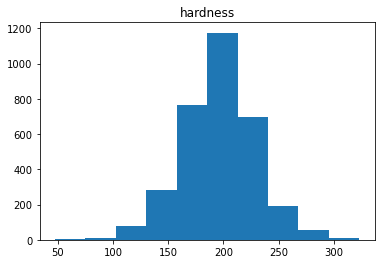

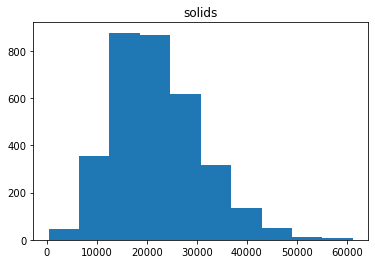

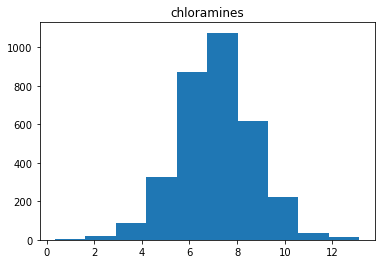

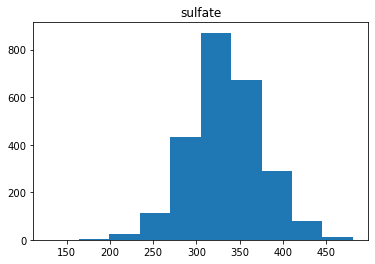

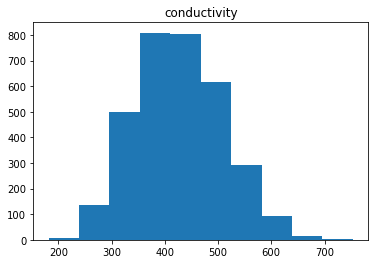

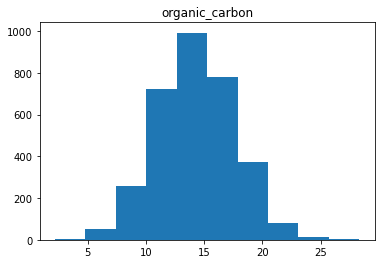

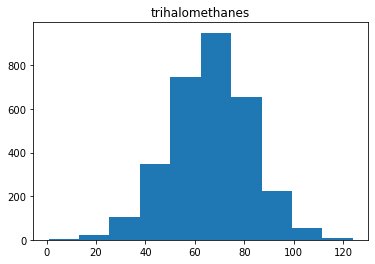

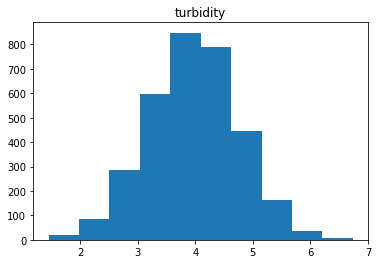

In [129]:
# Check the distributions
num_cols = df.columns[[df[col].dtype == 'float64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [130]:
obj_cols = df.columns[[df[col].dtype == 'int64' for col in df.columns]]

In [131]:
# describe object columns
for col in obj_cols:
    print(df[col].value_counts())
    print('----------------')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------')

0    1998
1    1278
Name: potability, dtype: int64
----------------
0    0.60989
1    0.39011
Name: potability, dtype: float64
----------------


In [132]:
# missing values

In [133]:
missing = df.isnull().sum()
missing[missing > 0]

sulfate            781
trihalomethanes    162
dtype: int64

In [134]:
df.dropna(inplace=True)

In [135]:
df.shape

(2373, 9)

In [136]:
# Baseline 0.596718
df.potability.value_counts(normalize=True)

0    0.602191
1    0.397809
Name: potability, dtype: float64

In [137]:
#. seeing that dropping the nulls did not change much of the 0/1 results

#### Takeways from data
 * potability is my target

### Split

In [164]:
train, validate, test = prepare.split_data(df)

In [165]:
# Validate my split.

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (1328, 9)
validate -> (570, 9)
test -> (475, 9)


In [166]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1328 entries, 7.2055591745887275 to 5.412762497595831
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hardness         1328 non-null   float64
 1   solids           1328 non-null   float64
 2   chloramines      1328 non-null   float64
 3   sulfate          1328 non-null   float64
 4   conductivity     1328 non-null   float64
 5   organic_carbon   1328 non-null   float64
 6   trihalomethanes  1328 non-null   float64
 7   turbidity        1328 non-null   float64
 8   potability       1328 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 103.8 KB


In [141]:
train.corr()[['potability']].sort_values(by = 'potability')

,potability
conductivity,-0.077228
sulfate,-0.037892
hardness,-0.026988
organic_carbon,-0.011794
trihalomethanes,-0.007720
chloramines,0.021347
turbidity,0.036061
solids,0.059326
potability,1.000000


In [142]:
# heatmap if time allows

### Explore

 * $H_o$: There is no association between solids and potability
 * $H_a$: There is an association between solids and potability

In [168]:
observed = pd.crosstab(train.solids, train.potability, margins=True)
observed

potability,0,1,All
solids,,,
320.942611274359,1,0,1
1351.9069790965912,0,1,1
1372.0910434922284,0,1,1
2808.025755679448,0,1,1
2912.2112468274267,1,0,1
...,...,...,...
50279.262429338494,1,0,1
50793.89891687405,0,1,1
55334.70279929284,1,0,1


In [169]:
# set our alpha
alpha = 0.05

In [172]:
# chi2 contingency return 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [173]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[   1    0    1]
 [   0    1    1]
 [   0    1    1]
 ...
 [   1    0    1]
 [   1    0    1]
 [ 800  528 1328]]
---
Expected

[[   0    0    1]
 [   0    0    1]
 [   0    0    1]
 ...
 [   0    0    1]
 [   0    0    1]
 [ 800  528 1328]]
---

chi^2 = 1328.0000
p     = 1.0000


In [174]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


In [175]:
# tenure with churn t-test

 * $H_o$: There is no association between conductivity and potability
 * $H_a$: There is an association between conductivity and potability

In [176]:
pd.crosstab(train.conductivity, train.potability, margins=True)

potability,0,1,All
conductivity,,,
201.6197367551575,0,1,1
210.31918197203672,1,0,1
251.02089870586465,1,0,1
252.968327784214,1,0,1
254.39327560480754,1,0,1
...,...,...,...
652.5375916144461,1,0,1
656.924127807846,0,1,1
666.6906183307466,1,0,1


### Modeling

In [144]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['potability'])
y_train = train.potability

X_validate = validate.drop(columns=['potability'])
y_validate = validate.potability

X_test = test.drop(columns=['potability'])
y_test = test.potability

In [145]:
type(X_train)

pandas.core.frame.DataFrame

In [146]:
type(y_train)

pandas.core.series.Series

In [147]:
df.isnull().sum()

hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

#### Decision Tree

In [148]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [149]:
type(clf)

sklearn.tree._classes.DecisionTreeClassifier

In [150]:
# model.fit(X, y)
clf = clf.fit(X_train, y_train)

In [151]:
type(clf)

sklearn.tree._classes.DecisionTreeClassifier

In [152]:
# visualize decision tree

In [153]:
y_pred = clf.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
type(y_pred)

numpy.ndarray

In [155]:
# changing a numpy array to a series

pd.Series(y_pred[0:5])

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [156]:
pd.DataFrame(y_pred[0:5])

,0
0,0
1,0
2,0
3,0
4,0


In [157]:
y_pred.mean()

0.03765060240963856

In [158]:
accuracy_df = pd.DataFrame(y_pred)
accuracy_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
1323,0
1324,0
1325,0
1326,0


In [159]:
accuracy_df['potability'] = y_train.reset_index(drop=True)
accuracy_df

,0,potability
0,0,0
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
1323,0,0
1324,0,1
1325,0,0
1326,0,0


In [160]:
# manual version of the clf.score
(accuracy_df[0] == accuracy_df['potability']).mean()

0.6370481927710844

In [161]:
clf.score(X_train, y_train)

0.6370481927710844

In [162]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.64


In [178]:
import matplotlib.pyplot as plt

[Text(357.12, 448.47, 'sulfate <= 260.92\ngini = 0.479\nsamples = 1328\nvalue = [800, 528]\nclass = solids'),
 Text(178.56, 366.93, 'solids <= 21161.408\ngini = 0.397\nsamples = 55\nvalue = [15, 40]\nclass = potability'),
 Text(89.28, 285.39, 'gini = 0.391\nsamples = 15\nvalue = [11, 4]\nclass = solids'),
 Text(267.84000000000003, 285.39, 'gini = 0.18\nsamples = 40\nvalue = [4, 36]\nclass = potability'),
 Text(535.6800000000001, 366.93, 'hardness <= 115.1\ngini = 0.473\nsamples = 1273\nvalue = [785, 488]\nclass = solids'),
 Text(446.4, 285.39, 'gini = 0.32\nsamples = 15\nvalue = [3, 12]\nclass = potability'),
 Text(624.96, 285.39, 'conductivity <= 371.036\ngini = 0.47\nsamples = 1258\nvalue = [782, 476]\nclass = solids'),
 Text(535.6800000000001, 203.84999999999997, 'gini = 0.496\nsamples = 349\nvalue = [191, 158]\nclass = solids'),
 Text(714.24, 203.84999999999997, 'sulfate <= 292.42\ngini = 0.455\nsamples = 909\nvalue = [591, 318]\nclass = solids'),
 Text(624.96, 122.31, 'solids <= 1

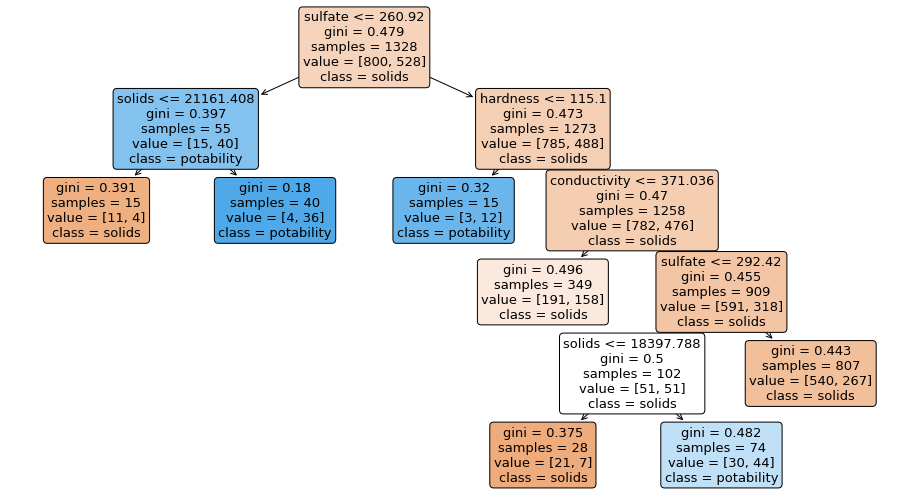

In [182]:
model = DecisionTreeClassifier(max_leaf_nodes=7)
model.fit(X_train, y_train)

plt.figure(figsize=(16, 9))
plot_tree(model, feature_names=X_train.columns.tolist(), class_names=['solids', 'potability'], filled=True, rounded=True)

In [183]:
pd.Series(dict(zip(X_train.columns, model.feature_importances_)))

hardness           0.125962
solids             0.324478
chloramines        0.000000
sulfate            0.421952
conductivity       0.127608
organic_carbon     0.000000
trihalomethanes    0.000000
turbidity          0.000000
dtype: float64

<AxesSubplot:ylabel='Feature Importance'>

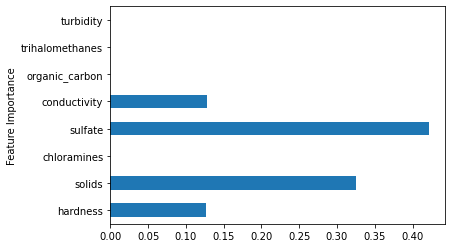

In [184]:
pd.Series(dict(zip(X_train.columns, model.feature_importances_))).plot.barh(xlabel='Feature Importance')

In [163]:
# Pick another model (Logistic Regression)

### Logistic Regression

In [186]:
train.corr()[['potability']].sort_values(by = 'potability')

,potability
conductivity,-0.077228
sulfate,-0.037892
hardness,-0.026988
organic_carbon,-0.011794
trihalomethanes,-0.007720
chloramines,0.021347
turbidity,0.036061
solids,0.059326
potability,1.000000


In [189]:
# Create the logistic regression
logit = LogisticRegression(random_state=123)

# specify the features we're using
features = ["solids", "conductivity", "sulfate"]

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[features])

print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

NameError: name 'baseline_accuracy' is not defined